In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 10 ##

## Alameda County Jury Panels ##

In [3]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


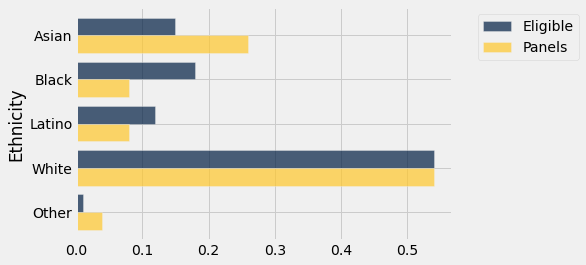

In [4]:
jury.barh('Ethnicity')

In [5]:
jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)

In [6]:
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [7]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

In [8]:
jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.1,0.1
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0,0
Other,0.01,0.04,0.03,0.03


In [9]:
sum(jury_with_diffs.column('Absolute Difference'))

0.28

In [10]:
sum(jury_with_diffs.column('Absolute Difference')) / 2

0.14

In [11]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [12]:
total_variation_distance(jury.column('Eligible'), jury.column('Panels'))

0.14

In [13]:
eligible = jury.column('Eligible')

In [14]:
sample_distribution = sample_proportions(1453, eligible)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)

In [15]:
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.152099
Black,0.18,0.08,0.172746
Latino,0.12,0.08,0.118376
White,0.54,0.54,0.545767
Other,0.01,0.04,0.0110117


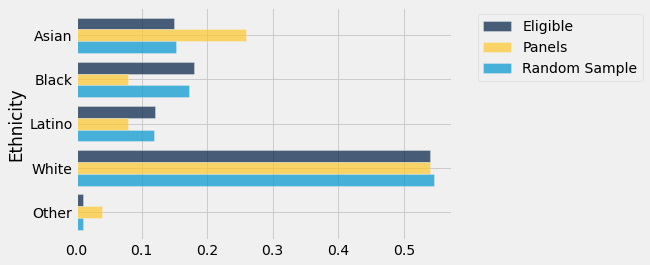

In [16]:
panels_and_sample.barh('Ethnicity')

In [17]:
total_variation_distance(panels_and_sample.column('Random Sample'), eligible)

0.008878183069511332

In [18]:
observed_tvd = total_variation_distance(jury.column('Panels'), eligible)
observed_tvd

0.14

In [19]:
sample_distribution = sample_proportions(1453, eligible)
total_variation_distance(sample_distribution, eligible)

0.010750172057811452

In [20]:
tvds = make_array()

for i in np.arange(10000):
    sample_distribution = sample_proportions(1453, eligible)
    new_tvd = total_variation_distance(sample_distribution, eligible)
    tvds = np.append(tvds, new_tvd)
    

## Decisions under uncertainty##

In [ ]:
scores = Table.read_table('scores_by_section.csv')
scores

In [ ]:
scores.group('Section')

In [ ]:
scores.group('Section', np.average).show()

In [ ]:
observed_average = 13.6667

In [ ]:
random_sample = scores.sample(27, with_replacement = False)
random_sample

In [ ]:
np.average(random_sample.column('Midterm'))

In [ ]:
random_sample = scores.sample(27, with_replacement = False)
np.average(random_sample.column('Midterm'))

In [ ]:
averages = make_array()

for i in np.arange(50000):
    random_sample = scores.sample(27, with_replacement = False)
    new_average = np.average(random_sample.column('Midterm'))
    averages = np.append(averages, new_average)    

In [ ]:
Table().with_column('Random Sample Average', averages).hist(bins = 25)
plots.scatter(observed_average, 0, color = 'red', s=40);

In [ ]:
sum(averages <= observed_average) / 50000

In [ ]:
np.count_nonzero(averages <= observed_average) / 50000

In [ ]:
np.count_nonzero(averages <= 13.6) / 50000

In [ ]:
Table().with_column('Random Sample Average', averages).hist(bins = 25)
plots.scatter(observed_average, 0, color='red', s=30)
plots.plot([13.6, 13.6], [0, 0.35], color='gold', lw=2);

In [ ]:
Table().with_column('Total Variation Distance', tvds).hist(bins = 20)